In [413]:
# Importing pandas to read dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the nltk library
import nltk
# since I was not having corpora data I'm manually installing it
#nltk.download()

import string
import re

#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
#importing tokenization library
from nltk.tokenize import sent_tokenize,word_tokenize
#importing TfidfVectorizer for vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
# importing Kmeans
from sklearn.cluster import KMeans
# importing metrics
import sklearn.metrics as metrics
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")

In [414]:
# Reading the data which was in csv file
data = pd.read_csv("Patient_Details.csv")
data.head()

,TEXT
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better""."
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself."
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours"
4,"Injection site swelling, redness, warm to the touch and itchy"


In [415]:
print("The length of the file is",len(data))

The length of the file is 499


In [416]:
if data.isnull().sum()[0]==0:
    print("No missing values present")
else:
    print("Missing values present")
    print(data.isnull().sum())

No missing values present


### Text preprocessing
####  This is kind of performing EDA on our data so I have imported the string library

### 1. Removing punctuations

In [417]:
# Punctuations present in the string library
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~������'

In [418]:
string.punctuation = string.punctuation + "�" #since this character is present in the csv but not in string punctuation library

In [419]:
#defining the function to remove punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the cleaned text

data['cleaned_text']= data['TEXT'].apply(lambda x:remove_punctuation(x))
data.head()

,TEXT,cleaned_text
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness Assessed at time of event Heart sounds normal Lung sounds clear Vitals within normal limits for patient O2 91 on 3 liters NC Continuous flow 2 consecutive nebulized albuterol treatments were administered At approximately 15 hours post reaction patients SOB and anxiousness had subsided and the patient stated that they were feel much better
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.",About 15 minutes after receiving the vaccine the patient complained about her left arm hurting She also complained of chest tightness and difficulty swallowing Patient also had vision changes We gave the patient 1 tablet of Benadryl 25 mg and called EMS services EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl Patient was able to walk out of facility herself
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours
4,"Injection site swelling, redness, warm to the touch and itchy",Injection site swelling redness warm to the touch and itchy


### 2. Converting the text to lower 

In [420]:
# Converting the texts into lower case
data['text_lower']= data['cleaned_text'].apply(lambda x: x.lower())
data.head()

,TEXT,cleaned_text,text_lower
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness Assessed at time of event Heart sounds normal Lung sounds clear Vitals within normal limits for patient O2 91 on 3 liters NC Continuous flow 2 consecutive nebulized albuterol treatments were administered At approximately 15 hours post reaction patients SOB and anxiousness had subsided and the patient stated that they were feel much better,approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patient o2 91 on 3 liters nc continuous flow 2 consecutive nebulized albuterol treatments were administered at approximately 15 hours post reaction patients sob and anxiousness had subsided and the patient stated that they were feel much better
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.",About 15 minutes after receiving the vaccine the patient complained about her left arm hurting She also complained of chest tightness and difficulty swallowing Patient also had vision changes We gave the patient 1 tablet of Benadryl 25 mg and called EMS services EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl Patient was able to walk out of facility herself,about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we gave the patient 1 tablet of benadryl 25 mg and called ems services ems checked her out and we advised the patient to go to the er to be observed and given more benadryl patient was able to walk out of facility herself
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours,extreme fatigue dizziness could not lift my left arm for 72 hours
4,"Injection site swelling, redness, warm to the touch and itchy",Injection site swelling redness warm to the touch and itchy,injection site swelling redness warm to the touch and itchy


### 3. Lemmatization and Tokenization

In [421]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [422]:

#defining the function for lemmatization

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]
data["text_lemmatized"] = data["text_lower"].apply(lemmatize_text)
data.head(2)

,TEXT,cleaned_text,text_lower,text_lemmatized
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swell, up, and, hinder, swallow, picture, take, benadryl, tylenol, take]"
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness Assessed at time of event Heart sounds normal Lung sounds clear Vitals within normal limits for patient O2 91 on 3 liters NC Continuous flow 2 consecutive nebulized albuterol treatments were administered At approximately 15 hours post reaction patients SOB and anxiousness had subsided and the patient stated that they were feel much better,approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patient o2 91 on 3 liters nc continuous flow 2 consecutive nebulized albuterol treatments were administered at approximately 15 hours post reaction patients sob and anxiousness had subsided and the patient stated that they were feel much better,"[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, and, anxiousness, assess, at, time, of, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, for, patient, o2, 91, on, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, be, administer, at, approximately, 15, hours, post, reaction, patients, sob, and, anxiousness, have, subside, and, the, patient, state, that, they, be, feel, much, better]"


### 4. Stop words removal

In [423]:
# Checking for stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10] # Checking for first 10 stopwords in our library

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [424]:
# Defining a function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [425]:
#applying the function

data['No_stopwords']= data['text_lemmatized'].apply(lambda x:remove_stopwords(x))
data.head(2)

,TEXT,cleaned_text,text_lower,text_lemmatized,No_stopwords
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swell, up, and, hinder, swallow, picture, take, benadryl, tylenol, take]","[right, side, epiglottis, swell, hinder, swallow, picture, take, benadryl, tylenol, take]"
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness Assessed at time of event Heart sounds normal Lung sounds clear Vitals within normal limits for patient O2 91 on 3 liters NC Continuous flow 2 consecutive nebulized albuterol treatments were administered At approximately 15 hours post reaction patients SOB and anxiousness had subsided and the patient stated that they were feel much better,approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patient o2 91 on 3 liters nc continuous flow 2 consecutive nebulized albuterol treatments were administered at approximately 15 hours post reaction patients sob and anxiousness had subsided and the patient stated that they were feel much better,"[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, and, anxiousness, assess, at, time, of, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, for, patient, o2, 91, on, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, be, administer, at, approximately, 15, hours, post, reaction, patients, sob, and, anxiousness, have, subside, and, the, patient, state, that, they, be, feel, much, better]","[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, anxiousness, assess, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, administer, approximately, 15, hours, post, reaction, patients, sob, anxiousness, subside, patient, state, feel, much, better]"


### 5.  Stemming

In [426]:
# Stemming is a text standardization step where the words are stemmed or diminished to their root/base form.

In [427]:
#defining the object for stemming
snow_stemmer = SnowballStemmer("english")

In [428]:
data['stemmed'] = data['No_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
#data = data.drop(columns=['cleaned_text']) # Get rid of the unstemmed column.
data.head(2) # Print dataframe.

,TEXT,cleaned_text,text_lower,text_lemmatized,No_stopwords,stemmed
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swell, up, and, hinder, swallow, picture, take, benadryl, tylenol, take]","[right, side, epiglottis, swell, hinder, swallow, picture, take, benadryl, tylenol, take]","[right, side, epiglotti, swell, hinder, swallow, pictur, take, benadryl, tylenol, take]"
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness Assessed at time of event Heart sounds normal Lung sounds clear Vitals within normal limits for patient O2 91 on 3 liters NC Continuous flow 2 consecutive nebulized albuterol treatments were administered At approximately 15 hours post reaction patients SOB and anxiousness had subsided and the patient stated that they were feel much better,approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patient o2 91 on 3 liters nc continuous flow 2 consecutive nebulized albuterol treatments were administered at approximately 15 hours post reaction patients sob and anxiousness had subsided and the patient stated that they were feel much better,"[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, and, anxiousness, assess, at, time, of, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, for, patient, o2, 91, on, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, be, administer, at, approximately, 15, hours, post, reaction, patients, sob, and, anxiousness, have, subside, and, the, patient, state, that, they, be, feel, much, better]","[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, anxiousness, assess, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, administer, approximately, 15, hours, post, reaction, patients, sob, anxiousness, subside, patient, state, feel, much, better]","[approxim, 30, min, post, vaccin, administr, patient, demonstr, sob, anxious, assess, time, event, heart, sound, normal, lung, sound, clear, vital, within, normal, limit, patient, o2, 91, 3, liter, nc, continu, flow, 2, consecut, nebul, albuterol, treatment, administ, approxim, 15, hour, post, reaction, patient, sob, anxious, subsid, patient, state, feel, much, better]"


In [429]:
## Since it was mentioned to keep the context intact numbers will not be removed even the alphnum will be retained

In [430]:
                                 ##### Text pre processing has been done ########

In [431]:
def listToString(s): 
    
    # initializing an empty string
    str1 = " "   
    return (str1.join(s))

In [432]:
data["text"] = data["stemmed"].apply(lambda x: listToString(x))

In [433]:
data.head(2)

,TEXT,cleaned_text,text_lower,text_lemmatized,No_stopwords,stemmed,text
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken,"[right, side, of, epiglottis, swell, up, and, hinder, swallow, picture, take, benadryl, tylenol, take]","[right, side, epiglottis, swell, hinder, swallow, picture, take, benadryl, tylenol, take]","[right, side, epiglotti, swell, hinder, swallow, pictur, take, benadryl, tylenol, take]",right side epiglotti swell hinder swallow pictur take benadryl tylenol take
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness Assessed at time of event Heart sounds normal Lung sounds clear Vitals within normal limits for patient O2 91 on 3 liters NC Continuous flow 2 consecutive nebulized albuterol treatments were administered At approximately 15 hours post reaction patients SOB and anxiousness had subsided and the patient stated that they were feel much better,approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patient o2 91 on 3 liters nc continuous flow 2 consecutive nebulized albuterol treatments were administered at approximately 15 hours post reaction patients sob and anxiousness had subsided and the patient stated that they were feel much better,"[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, and, anxiousness, assess, at, time, of, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, for, patient, o2, 91, on, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, be, administer, at, approximately, 15, hours, post, reaction, patients, sob, and, anxiousness, have, subside, and, the, patient, state, that, they, be, feel, much, better]","[approximately, 30, min, post, vaccination, administration, patient, demonstrate, sob, anxiousness, assess, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liters, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatments, administer, approximately, 15, hours, post, reaction, patients, sob, anxiousness, subside, patient, state, feel, much, better]","[approxim, 30, min, post, vaccin, administr, patient, demonstr, sob, anxious, assess, time, event, heart, sound, normal, lung, sound, clear, vital, within, normal, limit, patient, o2, 91, 3, liter, nc, continu, flow, 2, consecut, nebul, albuterol, treatment, administ, approxim, 15, hour, post, reaction, patient, sob, anxious, subsid, patient, state, feel, much, better]",approxim 30 min post vaccin administr patient demonstr sob anxious assess time event heart sound normal lung sound clear vital within normal limit patient o2 91 3 liter nc continu flow 2 consecut nebul albuterol treatment administ approxim 15 hour post reaction patient sob anxious subsid patient state feel much better


In [434]:
data = data["text"]

In [435]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size=0.3,random_state=42)

In [436]:
train_data.shape,test_data.shape

((349,), (150,))

In [437]:
train_data = pd.DataFrame(train_data,columns=["text"])

In [438]:
sentence = ""
for i in train_data["text"]:
    sentence = sentence + i

In [439]:
# Creating the Bag of Words model

word2count = {}
for word in sentence.split():
    if word not in word2count.keys():
        word2count[word] = 1
    else:
        word2count[word] += 1

In [440]:
df = pd.DataFrame()
df["Features"] = list(word2count.keys())
df["Count"] = list(word2count.values())
df.sort_values(by="Count",ascending=False)

,Features,Count
59,day,170
75,pain,144
56,inject,144
12,vaccin,143
10,hour,137
...,...,...
1060,metoprolol,1
1059,0700,1
1057,drastic,1
1056,evalupalpit,1


In [441]:
# selecting top 25 words and plotting it in a bar plot
plot = df.sort_values(by="Count",ascending=False)
plotie = plot[0:25]

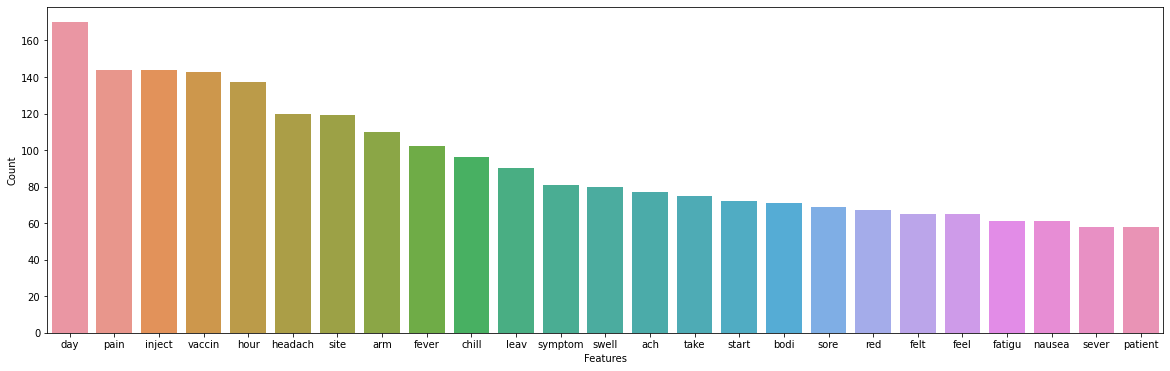

In [442]:
plt.figure(figsize=(20,6))
sns.barplot(x=plotie["Features"],y=plotie["Count"])
plt.show()

In [443]:
# We can see that the day,pain, inject and vaccin is repeated many number of times which turns to be true that this file corresponds to patient health

## Modeling

In [444]:
# Since we dont have any target columns we can build a model based on Unsupervised learning
# We can use clustering algorithm, Kmeans clusterring

In [445]:
# Converting string to vectors
vectorizer = TfidfVectorizer(analyzer="word")
X = vectorizer.fit_transform(train_data["text"])

In [446]:
X.shape # Checking the shape of the sparse matrix

(349, 1744)

In [447]:
# Since we are building the model of kmeans clustering algorithm it is necessary to find the optimum value of k
# so we will be using elbow method

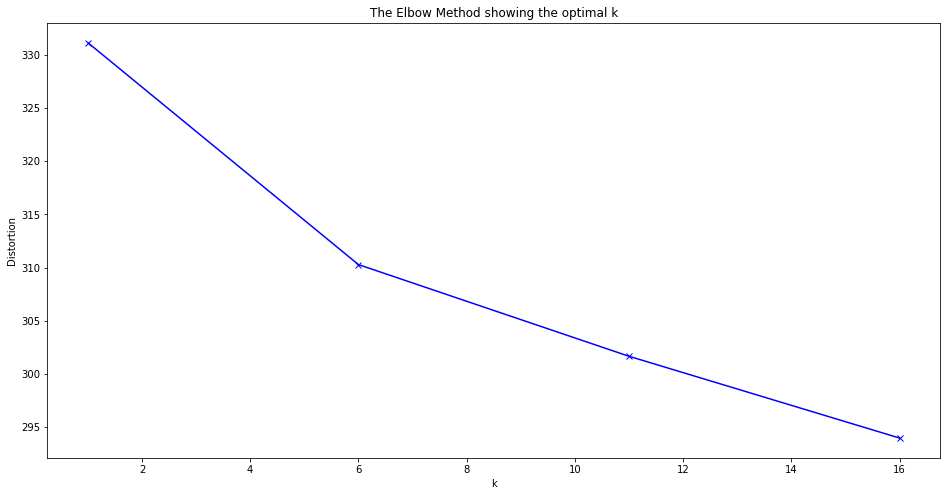

In [448]:
distortions = []
K = range(1,20,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [449]:
## we can see that the bend happens on 6 so the optimal value for k is 6 which means 6 clusters

In [450]:
text1 = train_data["text"].reset_index(drop=True)

In [451]:
X.shape

(349, 1744)

In [452]:
# Model building
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
result = pd.concat([text1,pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())],axis=1)
ytrain = kmeans.predict(X)
result['cluster'] = kmeans.predict(X)
print("The inertia of the model is",kmeans.inertia_)

The inertia of the model is 310.62066082529384


In [461]:
print(ytrain)

[0 1 0 3 3 4 0 3 5 4 4 4 0 0 2 5 1 3 5 3 3 0 5 1 3 0 0 0 5 0 0 4 4 5 4 0 3
 0 4 3 4 2 3 0 2 3 0 4 1 3 0 0 3 4 0 3 2 3 2 4 5 0 4 5 3 3 0 3 3 3 5 1 4 1
 3 3 4 1 0 3 0 1 4 3 0 0 3 4 4 0 5 0 3 0 3 0 2 0 0 0 5 4 0 0 1 4 0 4 4 0 2
 0 4 5 3 0 5 3 1 4 4 0 0 3 0 4 1 5 3 0 5 0 0 4 5 0 5 0 3 4 3 5 4 4 3 3 4 4
 2 3 5 0 0 0 3 0 4 0 0 1 4 0 0 3 5 1 0 0 0 0 5 1 5 0 1 3 4 0 3 0 0 0 3 0 1
 4 4 5 0 5 5 1 3 0 4 3 0 3 4 0 3 3 3 0 4 1 3 0 5 4 1 0 0 4 4 5 4 3 3 1 0 5
 4 0 4 0 1 0 4 4 2 3 0 4 3 2 3 4 4 1 5 1 0 5 4 3 5 1 3 1 4 0 3 0 4 4 1 3 4
 4 0 5 0 0 0 3 5 0 0 2 2 4 0 4 4 4 0 0 0 4 4 5 0 0 2 0 2 5 0 0 4 4 0 0 5 0
 4 0 2 5 0 5 4 4 4 0 5 0 5 5 4 5 3 5 4 3 2 0 5 1 0 0 0 0 1 4 3 3 4 5 4 1 0
 0 1 5 2 3 4 2 0 0 0 4 0 0 2 4 4]


In [453]:
result[["text","cluster"]]

,text,cluster
0,intermitt run tachycardia accompani dyspnea diaphoresi symptom begin approxim 6 hour receiv vaccin persist,0
1,tuesday headach sore arm come around even time night fever 102 kick wednesday 102101 fever take ibuprofen thursday call doctor fever 99101 tyenelol antibiot immun booster friday doctor oncal tell continu med call back saturday fever still 99101 rang,1
2,extrem fatigu dizzi could lift leav arm 72 hour,0
3,itch swell elev temperatur inject site 7 day inject benedryl improv symptom 50mg two day 9 day inject swell go itch diminish,3
4,patient develop lymphadenopathi 6 day moderna vaccin red great amount swell inject site 7 day vaccin,3
...,...,...
344,12 hour receiv vaccin leg felt heavi bottom right foot felt numb stand littl time feel heavi continu abl walk complet daili activ right arm felt pain similar receiv tetanus shoot take tylenol drink coffe felt better howev feel heavi leg continu sunday leav leg continu swell notic area knee cap upper part rim sock visibl swell red pain take motrin swell improv later notic musculoskelet pain general bodi ach improv mortin return abl continu adl,0
345,shoulder rednessitchingwarmth start 7 day inject advis use warm compresstylenolbenadryl advis fu uc ed newworsen symptom kind,0
346,patient give 05ml moderna vaccin 1503 state immedi receiv vaccin start tingl throat think anxieti wait awhil state start get wors notifi rn patient state past experi tingl sensat throat go away patient deni short breath rash bp 12078 oxygen 97 puls 46 respir 20 rn give 50mg im benadryl 1530 per protocol patient state 5 minut throat felt tight patient take conveni care evalu,2
347,nausea headach mild begin 5 hour vaccin middl night moder nausea chill fever moder muscl bodi ach moder headach moder issu continu throughout day vaccin motrin tylenol help lot,4


In [454]:
# testing the test data
test_data = pd.DataFrame(test_data,columns=["text"])
Xtest = vectorizer.transform(test_data["text"])

In [455]:
ytest= kmeans.predict(Xtest)
print(ytest)

[0 4 1 5 0 4 4 3 0 0 3 1 0 0 0 0 0 0 4 4 5 1 4 3 0 4 0 5 4 4 0 5 4 2 3 4 5
 0 0 3 3 1 0 2 5 0 4 3 4 0 5 0 0 4 1 3 0 4 0 2 5 0 0 3 5 0 2 3 0 0 1 0 3 4
 4 0 5 3 0 3 0 0 4 2 0 3 4 0 3 1 2 4 4 4 4 0 0 0 0 4 0 0 1 3 0 0 0 3 3 0 3
 0 0 0 5 2 0 2 0 0 0 3 4 3 4 0 0 5 2 4 5 3 0 5 0 4 0 0 1 0 3 5 1 0 0 5 2 1
 4 3]


In [460]:
result_test = pd.DataFrame(test_data["text"],index=test_data.index)
result_test["cluster"] = ytest
result_test.head()

,text,cluster
460,develop prurit erythemat plaqu inject site l upper arm day 8 receiv vaccin,0
73,nausea small terribl headach day advil reliev slight littl fatigu,4
231,moder sever nausea past 6 day,1
175,patient mild symptom immedi inject skin felt dri uncomfort symptom progress ny 5pm 4 hour post vaccin voic chang throat swell lip tingl congest throat nose seek treatment ed receiv solumedrol benadryl pepcid epinephrin tell anaphylactoid reaction monitor 4 hour ed discharg home fu po benadryl congest persist 24 hour event,5
237,headach coupl day sinc get vaccin take tylenol would help littl bite return,0


In [456]:
scoretrain = metrics.accuracy_score(ytrain,kmeans.predict(X))
scoretest = metrics.accuracy_score(ytest,kmeans.predict(Xtest))
print("The accuracy score of train is",score)
print("The accuracy score of test is",scoretest)

The accuracy score of train is 0.045845272206303724
The accuracy score of test is 1.0


In [412]:
# Since k-means is not a classification tool so analyzing the accuracy is not a very good idea.

In [408]:
## Now creating a counts for each topic for every word in the data [Analyzing the words]

In [409]:
text = ""
for i in data:
    text = text+i
token = word_tokenize(text)

In [410]:
T= vectorizer.fit_transform(token)

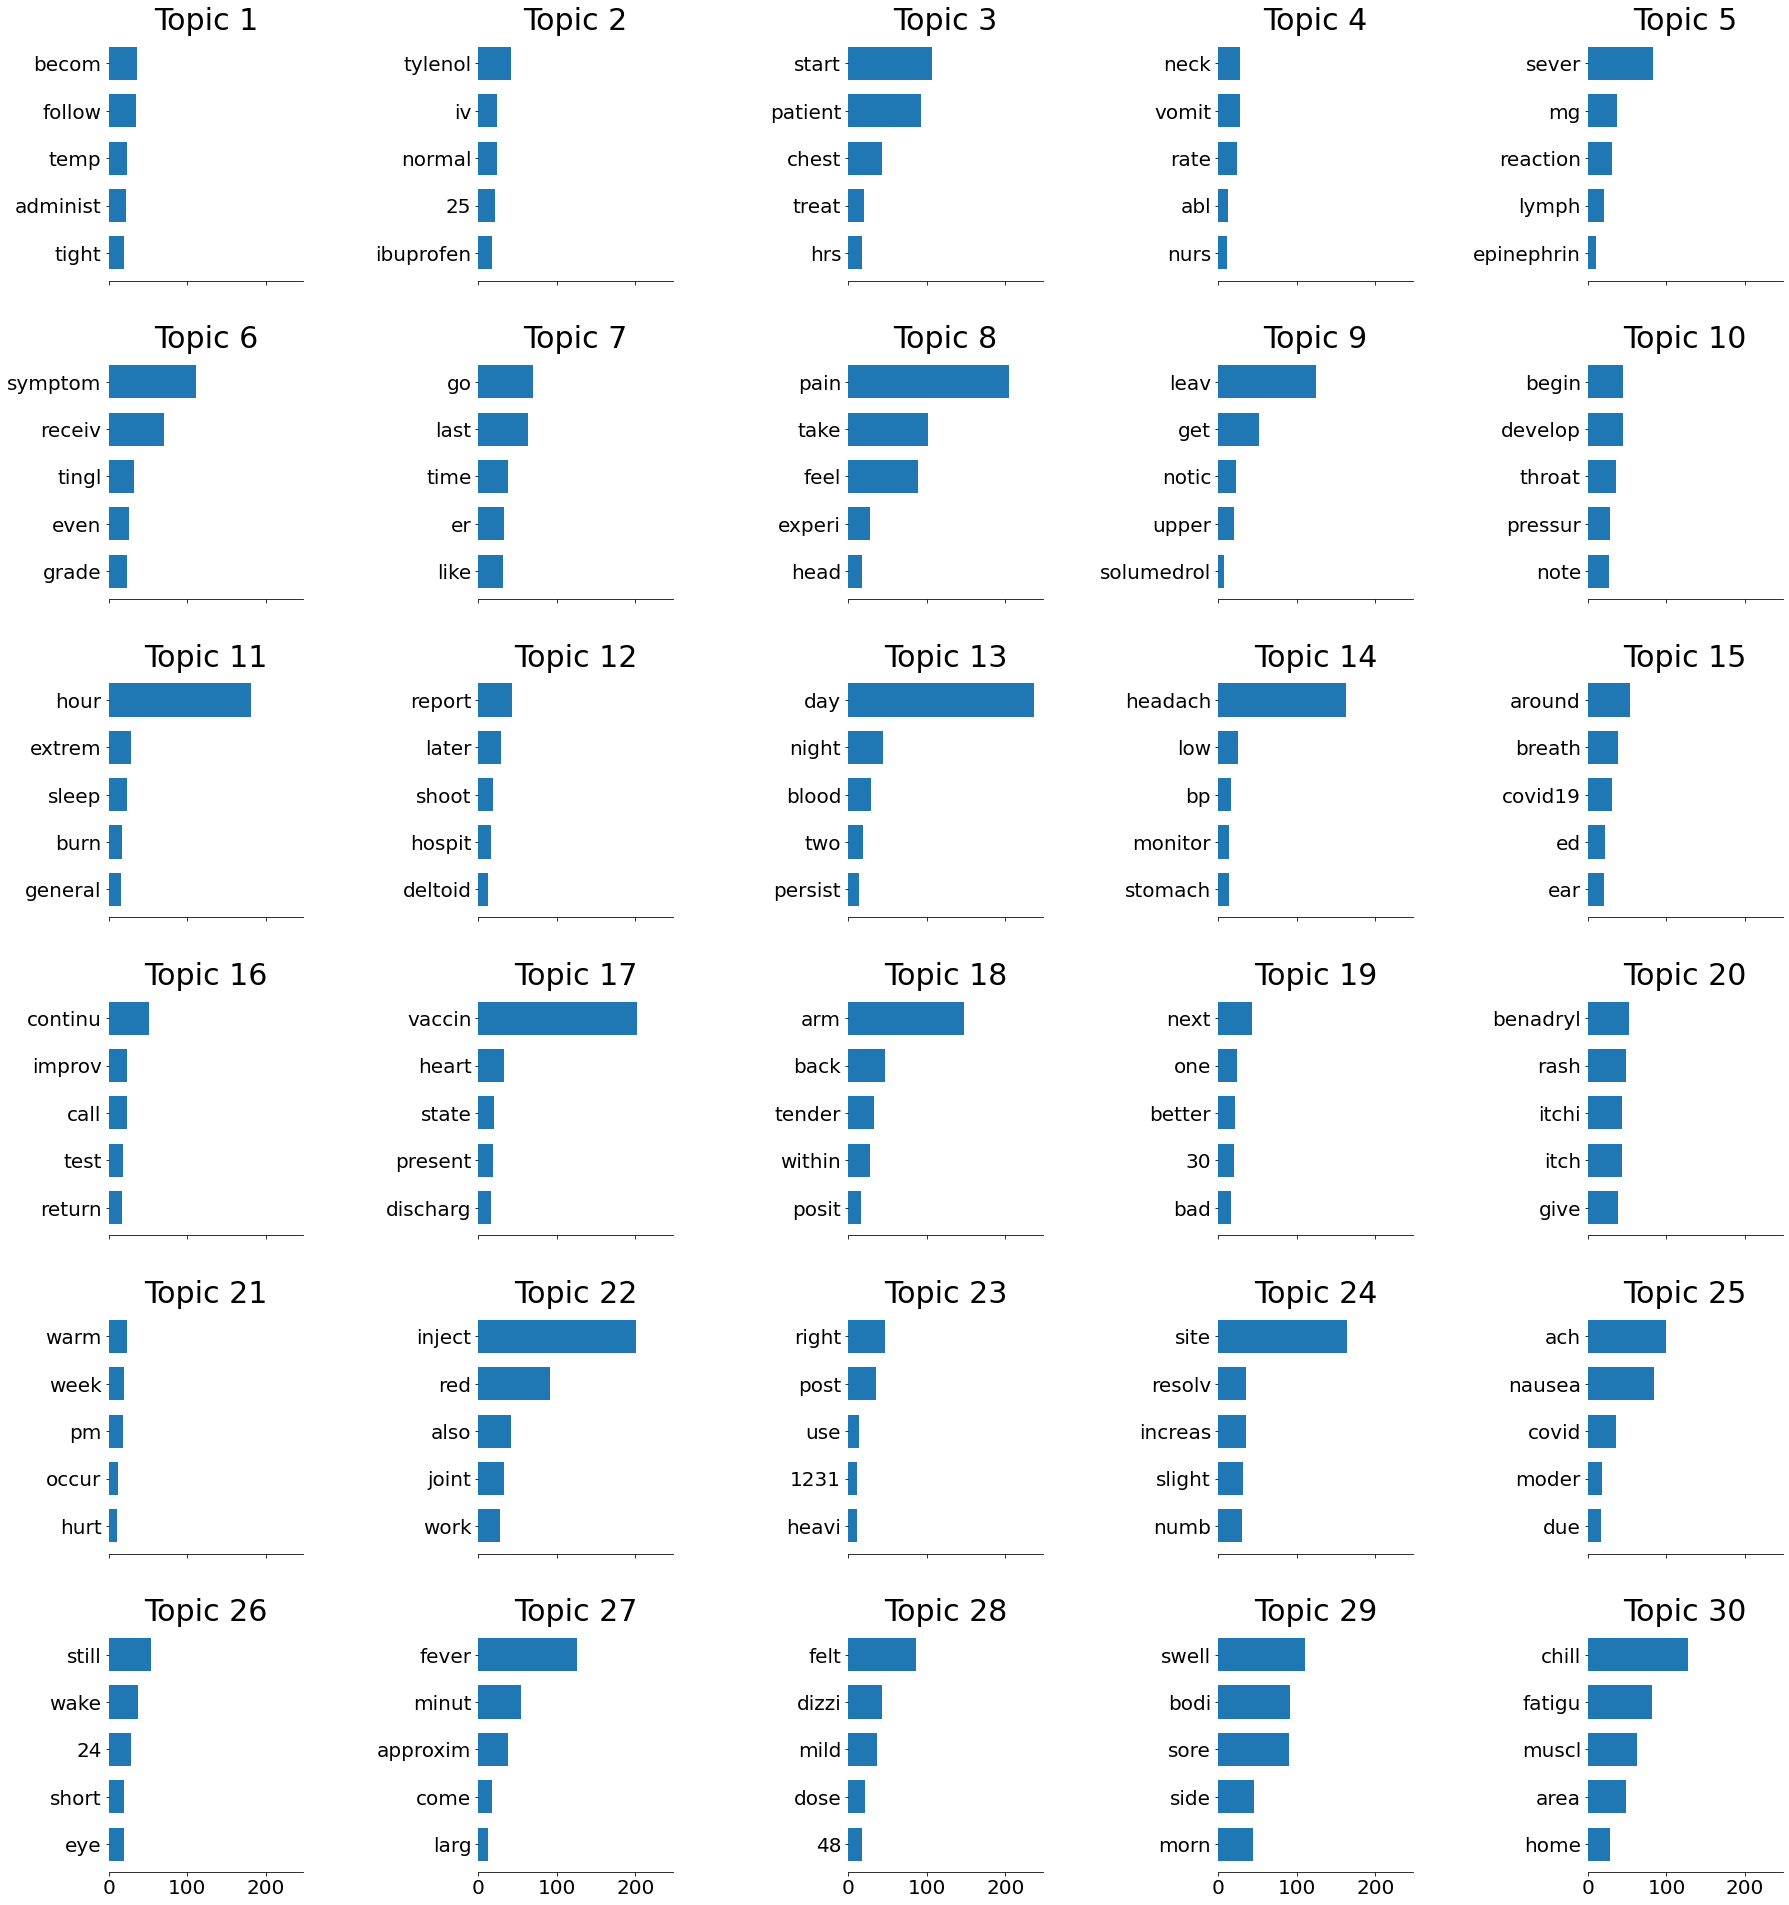

In [411]:
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
Xlda = lda.fit(T)
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = vectorizer.get_feature_names()
plot_top_words(Xlda, feature_names, n_top_words, '')